In [1]:
import pandas as pd
import numpy as nd
import seaborn as sns
from matplotlib import pyplot as plt


In [2]:
import os
print(os.getcwd())

C:\Users\DKIN\Desktop\Python code


In [3]:
df = pd.read_csv("./data_set/breast-cancer-wisconsin.data", names = ['id number','Clump Thickness','Cell Size','Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class'])

In [4]:
print(df.head())

   id number  Clump Thickness  Cell Size  Cell Shape  Marginal Adhesion  \
0    1000025                5          1           1                  1   
1    1002945                5          4           4                  5   
2    1015425                3          1           1                  1   
3    1016277                6          8           8                  1   
4    1017023                4          1           1                  3   

   Single Epithelial Cell Size Bare Nuclei  Bland Chromatin  Normal Nucleoli  \
0                            2           1                3                1   
1                            7          10                3                2   
2                            2           2                3                1   
3                            3           4                3                7   
4                            2           1                3                1   

   Mitoses  Class  
0        1      2  
1        1      2  
2       

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
id number                      699 non-null int64
Clump Thickness                699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Bland Chromatin                699 non-null int64
Normal Nucleoli                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [6]:
df['Bare Nuclei'].value_counts()

1     402
10    132
5      30
2      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [7]:
df[['Bare Nuclei']]=(df['Bare Nuclei'].replace('?',0)).astype(int)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
id number                      699 non-null int64
Clump Thickness                699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null int32
Bland Chromatin                699 non-null int64
Normal Nucleoli                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int32(1), int64(10)
memory usage: 57.4 KB


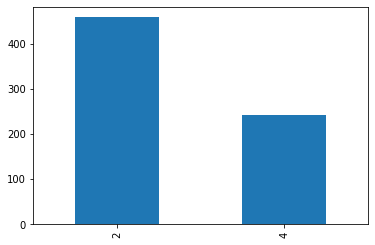

In [9]:
# from matplotlib import pyplot as plt
# fig = plt.figure()
# plt.bar(can_typ)
# plt.show()
df['Class'].value_counts().plot(kind='bar');


In [10]:
df.iloc[:,1:11].corr()

,Clump Thickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
Clump Thickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.589296,0.558428,0.535835,0.350034,0.716001
Cell Size,0.644913,1.000000,0.906882,0.705582,0.751799,0.684569,0.755721,0.722865,0.458693,0.817904
Cell Shape,0.654589,0.906882,1.000000,0.683079,0.719668,0.704529,0.735948,0.719446,0.438911,0.818934
Marginal Adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.665723,0.666715,0.603352,0.417633,0.696800
Single Epithelial Cell Size,0.521816,0.751799,0.719668,0.599599,1.000000,0.582904,0.616102,0.628881,0.479101,0.682785
Bare Nuclei,0.589296,0.684569,0.704529,0.665723,0.582904,1.000000,0.671545,0.572054,0.342795,0.817653
Bland Chromatin,0.558428,0.755721,0.735948,0.666715,0.616102,0.671545,1.000000,0.665878,0.344169,0.756616
Normal Nucleoli,0.535835,0.722865,0.719446,0.603352,0.628881,0.572054,0.665878,1.000000,0.428336,0.712244
Mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.342795,0.344169,0.428336,1.000000,0.423170
Class,0.716001,0.817904,0.818934,0.696800,0.682785,0.817653,0.756616,0.712244,0.423170,1.000000


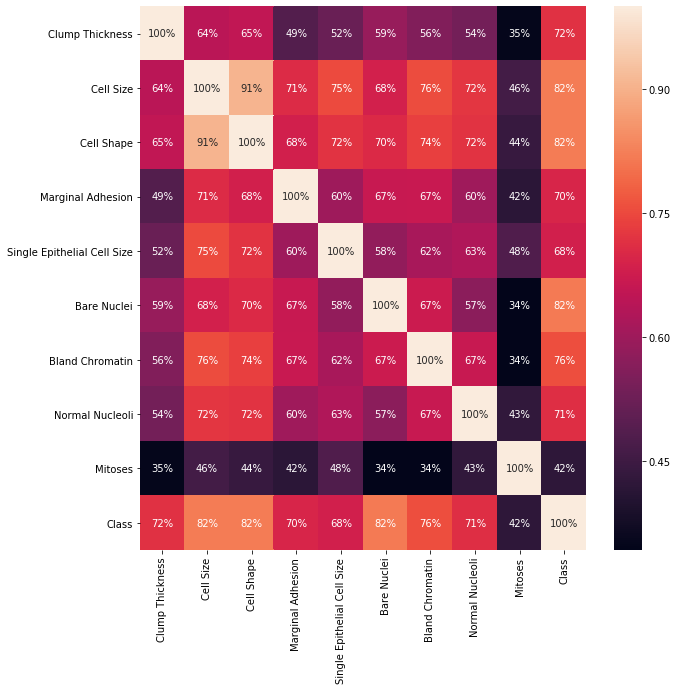

In [11]:
plt.figure(figsize=(10 ,10))
sns.heatmap(df.iloc[:,1:11].corr(),annot = True,fmt='.0%')

In [12]:
X = df.iloc[:,1:10].values
y= df.iloc[:,-1].values

In [13]:
from sklearn.model_selection import train_test_split
X_train , x_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=0)


In [14]:
#Scaling data so that all data are at same range
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
x_test = sc.fit_transform(x_test)

In [18]:
def model (X_train,y_train):
    #Logistic Regression
    from sklearn.linear_model import LogisticRegression
    log=LogisticRegression(random_state=0)
    log.fit(X_train,y_train)
    
    #Decision tree
    from sklearn.tree import DecisionTreeClassifier
    tree=DecisionTreeClassifier(criterion="entropy",random_state=0)
    tree.fit(X_train,y_train)
    
    #Random forest
    from sklearn.ensemble import RandomForestClassifier
    forest=RandomForestClassifier(n_estimators =10, criterion ="entropy",random_state=0)
    forest.fit(X_train,y_train)
    
    print('[0] Logistic Regression:',log.score(X_train,y_train))
    print('[1] Decision Tree :',tree.score(X_train,y_train))
    print('[2] Random forest:',forest.score(X_train,y_train))
    
    return log, tree, forest

model=model(X_train,y_train)

In [19]:
model=model(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[0] Logistic Regression: 0.9713740458015268
[1] Decision Tree : 1.0
[2] Random forest: 0.9942748091603053


In [28]:
from sklearn.metrics import confusion_matrix
for i in range(len(model)):
    print(i)
    cm= confusion_matrix(y_test,model[i].predict(x_test))
    TP =cm[0][0]
    TN = cm[1][1]
    FN = cm[1][0]
    FP = cm[0][1]
    print('Test_Accuracy= ',(TP+TN)/(TP+TN+FN+FP))

0
Test_Accuracy=  0.9657142857142857
1
Test_Accuracy=  0.9371428571428572
2
Test_Accuracy=  0.9657142857142857


In [30]:
# using following method we can get at metrices
from sklearn.metrics import classification_report, accuracy_score
for i in range(len(model)):
    print('Model: ', i)
    print(classification_report(y_test,model[i].predict(x_test)))
    print(accuracy_score(y_test,model[i].predict(x_test)))

Model:  0
              precision    recall  f1-score   support

           2       0.97      0.97      0.97       112
           4       0.95      0.95      0.95        63

    accuracy                           0.97       175
   macro avg       0.96      0.96      0.96       175
weighted avg       0.97      0.97      0.97       175

0.9657142857142857
Model:  1
              precision    recall  f1-score   support

           2       0.95      0.96      0.95       112
           4       0.92      0.90      0.91        63

    accuracy                           0.94       175
   macro avg       0.93      0.93      0.93       175
weighted avg       0.94      0.94      0.94       175

0.9371428571428572
Model:  2
              precision    recall  f1-score   support

           2       0.97      0.97      0.97       112
           4       0.95      0.95      0.95        63

    accuracy                           0.97       175
   macro avg       0.96      0.96      0.96       175
weight